# Project 1 Iris and Bike Sharing Data & Analytics

Jianying Zhu

03/21/2021

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix

from dmba import classificationSummary, gainsChart
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge

## Exercise 1

In [2]:
iris = pd.read_csv("C:\\Users\\14830\\Downloads\\iris_dataset.csv", header=None)
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'classes']

In [3]:
display(iris)

,sepal length,sepal width,petal length,petal width,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.describe(include = 'all')

,sepal length,sepal width,petal length,petal width,classes
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   classes       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.isnull().sum()
#iris.dtypes
#iris.shape
#iris = iris.reset_index(drop=False)

#method B add headers
#new_header = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
#iris.rename(columns = iris.iloc[0])
#iris = iris[0:] #take the data less the header row
#iris.columns = new_header 

sepal length    0
sepal width     0
petal length    0
petal width     0
classes         0
dtype: int64

In [7]:
#X contains all features(X = iris.data): all columns except the last column
X = iris.iloc[:,:-1].values
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
#y contains labels(y = iris.target): last column of the data frame
y = iris.iloc[:,-1]
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: classes, Length: 150, dtype: object


### Data Visualization

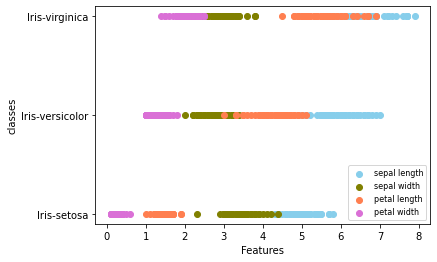

In [9]:
#relations of each feature with each class
plt.xlabel('Features')
plt.ylabel('classes')

pltX = iris.loc[:,'sepal length']
pltY = iris.loc[:,'classes']
plt.scatter(pltX, pltY, color='skyblue', label='sepal length')

pltX = iris.loc[:,'sepal width']
pltY = iris.loc[:,'classes']
plt.scatter(pltX, pltY, color='olive', label='sepal width')

pltX = iris.loc[:,'petal length']
pltY = iris.loc[:,'classes']
plt.scatter(pltX, pltY, color='coral', label='petal length')

pltX = iris.loc[:,'petal width']
pltY = iris.loc[:,'classes']
plt.scatter(pltX, pltY, color='orchid', label='petal width')
plt.legend(loc=4, prop={'size':8})
plt.show()

In [10]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train contains the training features
#X_test contains the testing features
#y_train contains the training label
#y_test contains the testing labels

In [11]:
#Feature Scaling
stdscaler = preprocessing.StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [12]:
print(f"train shape {X_train.shape}")
print(f"validation shape {X_test.shape}")
print(f"test shape {y_train.shape}")
print(f"test shape {y_test.shape}")

train shape (120, 4)
validation shape (30, 4)
test shape (120,)
test shape (30,)


### K Nearest Neighbors(KNN)

In [13]:
# try n_neighbors from 1 to 3
neighbors_settings = range(1, 5)
trainingScoreList = []
testScoreList = []
results = []

In [14]:
for k in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # record training score
    acc_knn = round(knn.score(X_train, y_train)*100, 2)
    # record test score
    testScore = round(knn.score(X_test, y_test)*100, 2)
    trainingScoreList.append(acc_knn)
    testScoreList.append(testScore)
    #Predicting Testing results
    y_pred_knn=knn.predict(X_test)
    #accuracy
    accuracy_knn = round(accuracy_score(y_test, y_pred_knn)*100, 2)
    results.append({'k': k,
                    'Train Set Score': acc_knn,
                    'Test Set Score': testScore,
                    'Accuracy': accuracy_knn
                               #accuracy_score(y_valid, knn.predict(X_valid))
                                })

In [15]:
# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

   k  Train Set Score  Test Set Score  Accuracy
0  1           100.00           93.33     93.33
1  2            97.50           96.67     96.67
2  3            96.67           96.67     96.67
3  4            96.67           96.67     96.67


In [16]:
#making confusion matrix
print('--- confusion matrix for test set in KNN ---')
print(confusion_matrix(y_test, y_pred_knn))

--- confusion matrix for test set in KNN ---
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


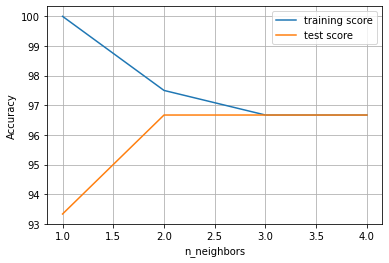

In [17]:
plt.plot(neighbors_settings, trainingScoreList, label="training score")
plt.plot(neighbors_settings, testScoreList, label="test score")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.grid()
plt.legend()
plt.show()

In [18]:
#check scores
print(classification_report(y_test, y_pred_knn))
#print('Accuracy score for KNN: %.2f' % accuracy_knn, '%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Naive Bayes

In [19]:
#Training
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [20]:
#Predicting Testing results
y_pred_nb = nb.predict(X_test)
#print("Test set predictions:", y_pred_nb)
#print('Predicted Values': y_pred_nb)
#print('Real Values(Original Test Set)': y_test)

In [21]:
pred_NB = pd.DataFrame({ 'Real Values':  y_test, 
                        'Predicted Values': y_pred_nb})
pred_NB

,Real Values,Predicted Values
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
100,Iris-virginica,Iris-virginica
40,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor


In [22]:
#making confusion matrix: check the accuracy of the predicted value in regression
print('--- confusion matrix for test set in Naive Bayes ---')
print(confusion_matrix(y_test, y_pred_nb))

--- confusion matrix for test set in Naive Bayes ---
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [23]:
acc_gaussian = round(nb.score(X_train, y_train)*100, 2)
#print("Test set accuracy: {:.2f}".format(nb.score(X_test, y_test)))

In [24]:
#check scores
print(classification_report(y_test, y_pred_nb))
accuracy_nb = round(accuracy_score(y_test, y_pred_nb)*100, 2)
#print('Accuracy score for Naive Bayes: %.2f' % accuracy_nb, '%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Logistic Regression

In [25]:
#Training
logistic = LogisticRegression(random_state=0, solver = 'lbfgs', multi_class = 'auto')
logistic.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
#Predicting Testing results
y_pred_logistic = logistic.predict(X_test)
#print('Predicted Values': y_pred_logistic)
#print('Real Values(Original Test Set)': y_test)

In [27]:
#Predicting probabilities
y_probs = logistic.predict_proba(X_test)
y_probs = np.round(y_probs,2)

In [28]:
#making confusion matrix
print('--- confusion matrix for test set in Logistic Regression ---')
print(confusion_matrix(y_test, y_pred_logistic))

--- confusion matrix for test set in Logistic Regression ---
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [29]:
acc_log = round(logistic.score(X_train, y_train)*100, 2)
test_log = round(logistic.score(X_test, y_test)*100, 2)

In [30]:
results3 = pd.DataFrame( {'y_test': y_test,
                          'y_pred': y_pred_logistic,
                          'Setosa(%)': y_probs[:,0],
                          'versicolor(%)': y_probs[:,1],
                          'virginica(%)': y_probs[:,2],
                          'Train Set Score': acc_log,
                          'Test Set Score': test_log})
display(results3)

,y_test,y_pred,Setosa(%),versicolor(%),virginica(%),Train Set Score,Test Set Score
114,Iris-virginica,Iris-virginica,0.00,0.03,0.97,95.83,100.0
62,Iris-versicolor,Iris-versicolor,0.01,0.96,0.04,95.83,100.0
33,Iris-setosa,Iris-setosa,1.00,0.00,0.00,95.83,100.0
107,Iris-virginica,Iris-virginica,0.00,0.08,0.92,95.83,100.0
7,Iris-setosa,Iris-setosa,0.98,0.02,0.00,95.83,100.0
100,Iris-virginica,Iris-virginica,0.00,0.01,0.99,95.83,100.0
40,Iris-setosa,Iris-setosa,0.98,0.02,0.00,95.83,100.0
86,Iris-versicolor,Iris-versicolor,0.01,0.71,0.28,95.83,100.0
76,Iris-versicolor,Iris-versicolor,0.00,0.73,0.27,95.83,100.0
71,Iris-versicolor,Iris-versicolor,0.02,0.90,0.08,95.83,100.0


In [31]:
#check scores
print(classification_report(y_test, y_pred_logistic))
accuracy_log = round(accuracy_score(y_test, y_pred_logistic)*100, 2)
#print('Accuracy score for Logistic Regression: %.2f' % accuracy_log, '%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Scores ranking**

In [32]:
results_compare = pd.DataFrame({ 'Models': ['KNN', 'Naive Bayes', 'Logistic Regression'], 
                        'Score': [acc_knn, acc_gaussian, acc_log], 
                        "Accuracy Score":[accuracy_knn, accuracy_nb, accuracy_log]})

result_compare = results_compare.sort_values(by='Accuracy Score', ascending=False)
result_compare = result_compare.reset_index(drop=True)
display(result_compare)

,Models,Score,Accuracy Score
0,Logistic Regression,95.83,100.00
1,KNN,96.67,96.67
2,Naive Bayes,95.00,96.67


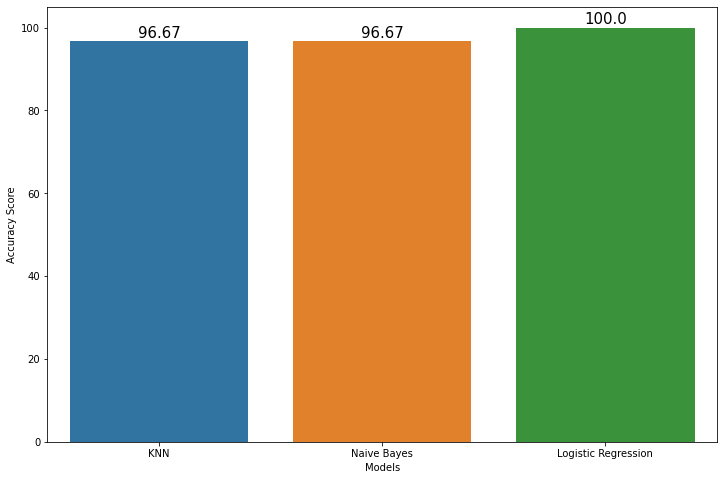

In [33]:
#make a plot
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Models',y="Accuracy Score", data = results_compare)
labels = (results_compare["Accuracy Score"])# add result numbers on barchart
for i, v in enumerate(labels): 
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

**Observations**

As we see the best model is given by Logistic Regression(100% Accuracy) and followed by KNN and Naive Bayes.

## Exercise 2

In [34]:
hour_raw = pd.read_csv('C:\\Users\\14830\\Downloads\\hour.csv')
day_raw = pd.read_csv('C:\\Users\\14830\\Downloads\\day.csv')

In [35]:
display(hour_raw)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [36]:
display(day_raw)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [37]:
hour_raw.info()
hour_raw.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [38]:
day_raw.info()
day_raw.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [39]:
#print(hour_raw.isnull().any())
print(hour_raw.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [40]:
#print(day_raw.isnull().any())
print(day_raw.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Data preprocessing

- Part1: hour file

In [41]:
hour = hour_raw.copy()
info = pd.DataFrame(columns=('Casual', 'Registered', 'cnt'))
info['Casual'] = hour['casual'].describe()
info['Registered'] = hour['registered'].describe()
info['cnt'] = hour['cnt'].describe()
display(info)

,Casual,Registered,cnt
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


In [42]:
#['instant', 'dteday'] not useful
#holiday, workingday not need to get dummy
category_features = ['season', 'holiday', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']
hour[category_features] = hour[category_features].astype('category')

In [43]:
hour.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [44]:
print(hour[category_features].astype('category'))

      season holiday yr mnth  hr weekday workingday weathersit
0          1       0  0    1   0       6          0          1
1          1       0  0    1   1       6          0          1
2          1       0  0    1   2       6          0          1
3          1       0  0    1   3       6          0          1
4          1       0  0    1   4       6          0          1
...      ...     ... ..  ...  ..     ...        ...        ...
17374      1       0  1   12  19       1          1          2
17375      1       0  1   12  20       1          1          2
17376      1       0  1   12  21       1          1          1
17377      1       0  1   12  22       1          1          1
17378      1       0  1   12  23       1          1          1

[17379 rows x 8 columns]


In [45]:
features = category_features + number_features

In [46]:
target = ['casual','registered','cnt']
y = hour[target]

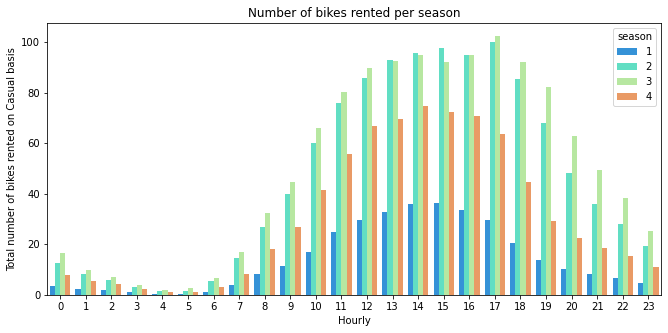

In [47]:
plt.figure(figsize=(11,5))
sns.barplot('hr','casual',hue='season', data=hour, palette='rainbow', ci=None)
plt.xlabel('Hourly')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')
plt.show()

Text(0.5, 1.0, 'Number of bikes rented per season')

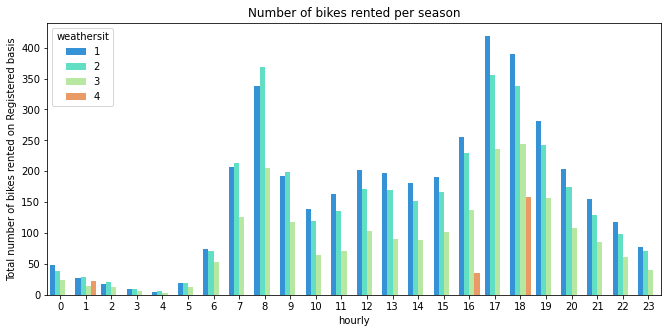

In [48]:
plt.figure(figsize=(11,5))
sns.barplot('hr','registered', hue='weathersit', data=hour, palette='rainbow', ci=None)
plt.xlabel('hourly')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')

Seeing from these two plots above, we could know that casual users and registered users behaved differently per hourly due to seasons and weathers. As the graph showed, casual users are less likely to use bike rental service in winter(season 1), while the most preferable season for them is spring(season 2). For the registered users, even in the winter time(season 1), they still consider to use the bike rental service, but they use it lessly in fall(season 4).

### Correlation Matrix

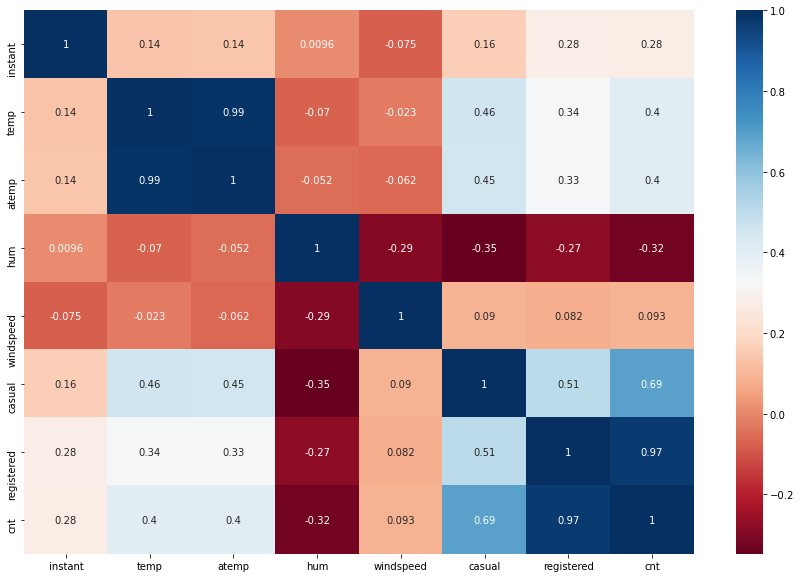

In [49]:
plt.figure(figsize = (15,10))
sns.heatmap(hour.corr(), annot = True, cmap="RdBu")
plt.show()

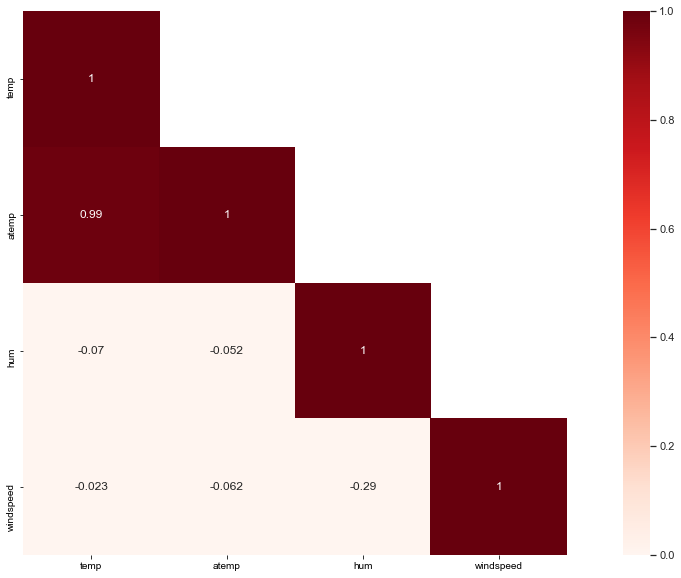

In [50]:
matrix = hour[features].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

- Casual and registered contain direct information about the bike sharing count which is to predict. Therefore they are not considered in the features.
- The variables "temp" and "atemp" are strongly correlated. To reduce the dimensionality of the predictive model, the feature "atemp" should be removed.

In [51]:
# One hot encoding on categorical columns
X1 = pd.get_dummies(hour[features], drop_first=True)
X2 = pd.get_dummies(hour[features], drop_first=True)
X3 = pd.get_dummies(hour[features], drop_first=True)

In [52]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y.casual, test_size = 0.3, random_state = 0)
print(f"X train shape {X_train1.shape}")
print(f"X test shape {X_test1.shape}")
print(f"y train shape {y_train1.shape}")
print(f"y test shape {y_test1.shape}")

X train shape (12165, 53)
X test shape (5214, 53)
y train shape (12165,)
y test shape (5214,)


In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y.registered, test_size = 0.3, random_state = 0)
print(f"X train shape {X_train2.shape}")
print(f"X test shape {X_test2.shape}")
print(f"y train shape {y_train2.shape}")
print(f"y test shape {y_test2.shape}")

X train shape (12165, 53)
X test shape (5214, 53)
y train shape (12165,)
y test shape (5214,)


In [54]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y.cnt, test_size = 0.3, random_state = 0)
print(f"X train shape {X_train3.shape}")
print(f"X test shape {X_test3.shape}")
print(f"y train shape {y_train3.shape}")
print(f"y test shape {y_test3.shape}")

X train shape (12165, 53)
X test shape (5214, 53)
y train shape (12165,)
y test shape (5214,)


In [55]:
stdscaler = preprocessing.StandardScaler()

In [56]:
X_train1 = stdscaler.fit_transform(X_train1)
X_test1 = stdscaler.transform(X_test1)
print(f"X train shape and X test shape {X_train1.shape, X_test1.shape}")

X train shape and X test shape ((12165, 53), (5214, 53))


In [57]:
X_train2 = stdscaler.fit_transform(X_train2)
X_test2 = stdscaler.transform(X_test2)
print(f"X train shape and X test shape {X_train2.shape, X_test2.shape}")

X train shape and X test shape ((12165, 53), (5214, 53))


In [58]:
X_train3 = stdscaler.fit_transform(X_train3)
X_test3 = stdscaler.transform(X_test3)
print(f"X train shape and X test shape {X_train3.shape, X_test3.shape}")

X train shape and X test shape ((12165, 53), (5214, 53))


### Linear Regression Model

In [59]:
#lm = LinearRegression()
#training model in training set
lm1 = LinearRegression().fit(X_train1, y_train1)
lm2 = LinearRegression().fit(X_train2, y_train2)
lm3 = LinearRegression().fit(X_train3, y_train3)

**For Casual users**

In [60]:
#making predection
y_pred_lm1_train = lm1.predict(X_train1)
y_pred_lm1_test = lm1.predict(X_test1)

pred_lm1 = pd.DataFrame({'Actual Values':  y_test1, 
                        'Predicted Values': y_pred_lm1_test,
                        'Residual': y_test1 - y_pred_lm1_test})
display(pred_lm1)

,Actual Values,Predicted Values,Residual
3439,4,39.497308,-35.497308
6542,1,-9.717535,10.717535
15470,81,50.395746,30.604254
9851,45,46.094965,-1.094965
12640,83,50.384027,32.615973
...,...,...,...
13321,6,45.880121,-39.880121
5252,74,68.426996,5.573004
12510,184,114.584601,69.415399
6842,64,69.544897,-5.544897


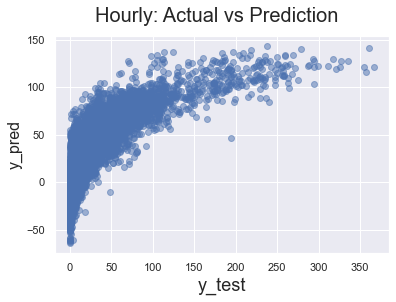

In [61]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test1, y_pred_lm1_test, alpha=.5)
fig.suptitle('Hourly: Actual vs Prediction', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [62]:
# print coefficients
print('intercept: ', lm1.intercept_)
print(pd.DataFrame({'Predictor': X1.columns, 'coefficient': lm1.coef_}))

intercept:  35.83578133682749
       Predictor   coefficient
0           temp  1.288038e+01
1          atemp  3.825044e+00
2            hum -5.123480e+00
3      windspeed -1.870091e+00
4       season_2  3.827960e+00
5       season_3  6.214612e-01
6       season_4  1.401461e+00
7      holiday_1 -6.893157e+12
8           yr_1  5.958476e+00
9         mnth_2 -4.992981e-01
10        mnth_3  2.234985e+00
11        mnth_4  2.092285e+00
12        mnth_5  2.176117e+00
13        mnth_6 -2.886963e-02
14        mnth_7 -4.594727e-01
15        mnth_8  7.957153e-01
16        mnth_9  2.717651e+00
17       mnth_10  3.760742e+00
18       mnth_11  1.654175e+00
19       mnth_12 -3.942871e-02
20          hr_1 -3.367920e-01
21          hr_2 -7.246094e-01
22          hr_3 -1.202637e+00
23          hr_4 -1.345825e+00
24          hr_5 -9.399414e-01
25          hr_6 -2.832031e-01
26          hr_7  8.869019e-01
27          hr_8  2.942017e+00
28          hr_9  4.029846e+00
29         hr_10  6.689392e+00
30       

In [63]:
# print performance measure
regressionSummary(y_train1, y_pred_lm1_train)
regressionSummary(y_test1, y_pred_lm1_test)


Regression statistics

               Mean Error (ME) : -0.0014
Root Mean Squared Error (RMSE) : 31.5823
     Mean Absolute Error (MAE) : 21.8525

Regression statistics

               Mean Error (ME) : -0.8178
Root Mean Squared Error (RMSE) : 31.6644
     Mean Absolute Error (MAE) : 22.0407


**For Registered users**

In [64]:
y_pred_lm2_train = lm2.predict(X_train2)
y_pred_lm2_test = lm2.predict(X_test2)


pred_lm2 = pd.DataFrame({ 'Actual Values':  y_test2, 
                        'Predicted Values': y_pred_lm2_test,
                        'Residual': y_test2 - y_pred_lm2_test})
display(pred_lm2)

,Actual Values,Predicted Values,Residual
3439,3,-15.669142,18.669142
6542,4,18.787890,-14.787890
15470,662,355.674608,306.325392
9851,163,82.682421,80.317579
12640,250,234.237108,15.762892
...,...,...,...
13321,29,101.580858,-72.580858
5252,497,392.635546,104.364454
12510,315,200.727156,114.272844
6842,238,254.265411,-16.265411


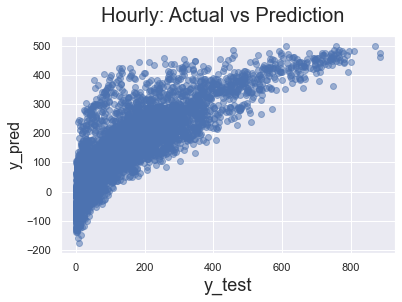

In [65]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test2, y_pred_lm2_test, alpha=.5)
fig.suptitle('Hourly: Actual vs Prediction', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [66]:
# print coefficients
print('intercept: ', lm2.intercept_)
print(pd.DataFrame({'Predictor': X2.columns, 'coefficient': lm2.coef_}))

intercept:  153.43979248545045
       Predictor   coefficient
0           temp  2.934465e+00
1          atemp  2.120292e+01
2            hum -9.696345e+00
3      windspeed -1.172962e+00
4       season_2  1.158295e+01
5       season_3  1.194764e+01
6       season_4  2.905608e+01
7      holiday_1 -1.654513e+13
8           yr_1  3.683928e+01
9         mnth_2  2.332764e-01
10        mnth_3  1.936279e+00
11        mnth_4  9.355469e-01
12        mnth_5  5.568848e+00
13        mnth_6  4.599243e+00
14        mnth_7 -3.850098e-01
15        mnth_8  4.024658e+00
16        mnth_9  7.733398e+00
17       mnth_10  1.426758e+00
18       mnth_11 -4.732666e+00
19       mnth_12 -2.678223e+00
20          hr_1 -2.996964e+00
21          hr_2 -4.781982e+00
22          hr_3 -6.435547e+00
23          hr_4 -7.138184e+00
24          hr_5 -4.199707e+00
25          hr_6  7.245605e+00
26          hr_7  3.227112e+01
27          hr_8  6.114166e+01
28          hr_9  2.845129e+01
29         hr_10  1.500269e+01
30      

In [67]:
regressionSummary(y_train2, y_pred_lm2_train)
regressionSummary(y_test2, y_pred_lm2_test)


Regression statistics

               Mean Error (ME) : -0.0067
Root Mean Squared Error (RMSE) : 84.8311
     Mean Absolute Error (MAE) : 62.2214

Regression statistics

               Mean Error (ME) : 0.4114
Root Mean Squared Error (RMSE) : 86.6197
     Mean Absolute Error (MAE) : 63.6770


**For both causal and registered users**

In [68]:
y_pred_lm3_train = lm3.predict(X_train3)
y_pred_lm3_test = lm3.predict(X_test3)

pred_lm3 = pd.DataFrame({ 'Actual Values':  y_test3, 
                        'Predicted Values': y_pred_lm3_test,
                        'Residual': y_test3 - y_pred_lm3_test})
display(pred_lm3)

,Actual Values,Predicted Values,Residual
3439,7,23.886741,-16.886741
6542,5,8.964866,-3.964866
15470,743,406.050804,336.949196
9851,208,128.824241,79.175759
12640,333,284.597679,48.402321
...,...,...,...
13321,35,147.464866,-112.464866
5252,571,461.042991,109.957009
12510,499,315.287997,183.712003
6842,302,323.827564,-21.827564


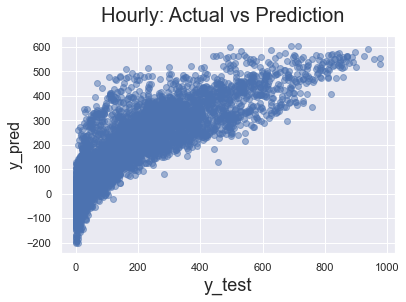

In [69]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test3, y_pred_lm3_test, alpha=.5)
fig.suptitle('Hourly: Actual vs Prediction', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [70]:
# print coefficients
print('intercept: ', lm3.intercept_)
print(pd.DataFrame({'Predictor': X3.columns, 'coefficient': lm3.coef_}))

intercept:  189.27557382227795
       Predictor   coefficient
0           temp  1.581484e+01
1          atemp  2.502589e+01
2            hum -1.482172e+01
3      windspeed -3.043565e+00
4       season_2  1.541401e+01
5       season_3  1.256986e+01
6       season_4  3.045639e+01
7      holiday_1 -2.343829e+13
8           yr_1  4.280382e+01
9         mnth_2 -2.631836e-01
10        mnth_3  4.165283e+00
11        mnth_4  3.029297e+00
12        mnth_5  7.752228e+00
13        mnth_6  4.568604e+00
14        mnth_7 -8.461914e-01
15        mnth_8  4.827637e+00
16        mnth_9  1.044971e+01
17       mnth_10  5.183594e+00
18       mnth_11 -3.078125e+00
19       mnth_12 -2.709961e+00
20          hr_1 -3.336792e+00
21          hr_2 -5.490234e+00
22          hr_3 -7.642090e+00
23          hr_4 -8.493652e+00
24          hr_5 -5.132812e+00
25          hr_6  6.963623e+00
26          hr_7  3.314050e+01
27          hr_8  6.407947e+01
28          hr_9  3.248022e+01
29         hr_10  2.169116e+01
30      

In [71]:
regressionSummary(y_train3, y_pred_lm3_train)
regressionSummary(y_test3, y_pred_lm3_test)


Regression statistics

                      Mean Error (ME) : 0.0050
       Root Mean Squared Error (RMSE) : 101.2019
            Mean Absolute Error (MAE) : 74.9873
          Mean Percentage Error (MPE) : 58.2205
Mean Absolute Percentage Error (MAPE) : 278.4738

Regression statistics

                      Mean Error (ME) : -0.3934
       Root Mean Squared Error (RMSE) : 102.7886
            Mean Absolute Error (MAE) : 76.4962
          Mean Percentage Error (MPE) : 96.2814
Mean Absolute Percentage Error (MAPE) : 317.3436


In [72]:
# print R-squared
r2_score = pd.DataFrame([(adjusted_r2_score(y_train1, y_pred_lm1_train, lm1), 
                        adjusted_r2_score(y_train2, y_pred_lm2_train, lm2),
                        adjusted_r2_score(y_train3, y_pred_lm3_train, lm3)),
                       (adjusted_r2_score(y_test1, y_pred_lm1_test, lm1), 
                        adjusted_r2_score(y_test2, y_pred_lm2_test, lm2), 
                        adjusted_r2_score(y_test3, y_pred_lm3_test, lm3))],
                  index = ['Train Set', 'Test Set'],
                  columns=('Casual', 'Registered', 'Total'))
display(r2_score)

,Casual,Registered,Total
Train Set,0.590931,0.683172,0.686759
Test Set,0.575883,0.672251,0.676933


From the above results of the table, we could know that the REGISTERED users have the highest R squared that means it has the highest accuracy(68.32% > 59.09%). In reality, people buying monthly service of renting bikes are being more stable than those occasionally or randomly use rental service. Those registered users are lessly like to change their plan except specific factors happened, like special weather conditions, rain and snow, will adjust their travel plan. Comparably, the CASUAL has the lowest R-square users with low accuracy. So their behaviors are usually unpredictable. In general, the overall results attains 68.67%, and it is closely to the registered data, which is really good results.

### Data Preprocessing

- Part2: day file

In [73]:
day = day_raw.copy()
info1 = pd.DataFrame(columns=('Casual', 'Registered', 'cnt'))
info1['Casual'] = day['casual'].describe()
info1['Registered'] = day['registered'].describe()
info1['cnt'] = day['cnt'].describe()
display(info1)

,Casual,Registered,cnt
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


In [74]:
category_features1 = ['season', 'holiday', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']
number_features1 = ['temp', 'atemp', 'hum', 'windspeed']
day[category_features1] = day[category_features1].astype('category')

In [75]:
day.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [76]:
print(day[category_features1].astype('category'))

    season holiday yr mnth weekday workingday weathersit
0        1       0  0    1       6          0          2
1        1       0  0    1       0          0          2
2        1       0  0    1       1          1          1
3        1       0  0    1       2          1          1
4        1       0  0    1       3          1          1
..     ...     ... ..  ...     ...        ...        ...
726      1       0  1   12       4          1          2
727      1       0  1   12       5          1          2
728      1       0  1   12       6          0          2
729      1       0  1   12       0          0          1
730      1       0  1   12       1          1          2

[731 rows x 7 columns]


In [77]:
features1 = category_features1 + number_features1

In [78]:
target = ['casual','registered','cnt']
y_day = day[target]

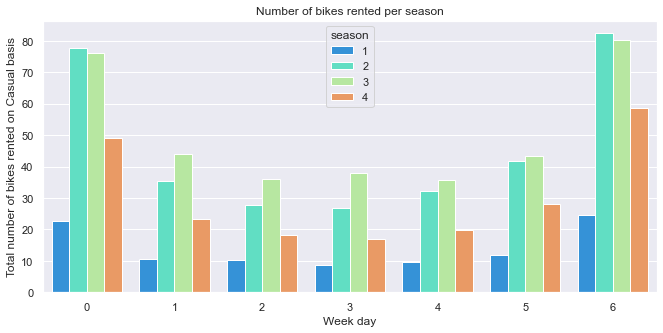

In [79]:
plt.figure(figsize=(11,5))
sns.barplot('weekday','casual',hue='season', data=hour, palette='rainbow', ci=None)
plt.xlabel('Week day')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')
plt.show()

Text(0.5, 1.0, 'Number of bikes rented per season')

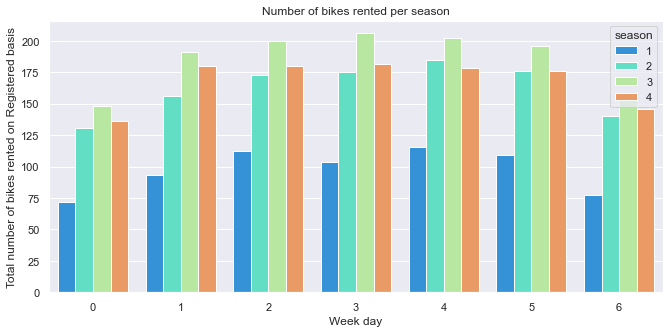

In [80]:
plt.figure(figsize=(11,5))
sns.barplot('weekday','registered', hue='season', data=hour, palette='rainbow', ci=None)
plt.xlabel('Week day')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')

From these two plots above, we could know that casual users and registered users behaved differently in workday due to seasons and weathers. As the graph showed, casual users are more likely to use bike rental service in spring and summer(season 2&3), while they are less likely to use the bike service in winter(season 1). For the registered users, they prefer using the bike rental service in summer, Fall, and spring(season 2&3&4), but the numbers of users are still higher than causal in winter(season1).

### Correlation Matrix

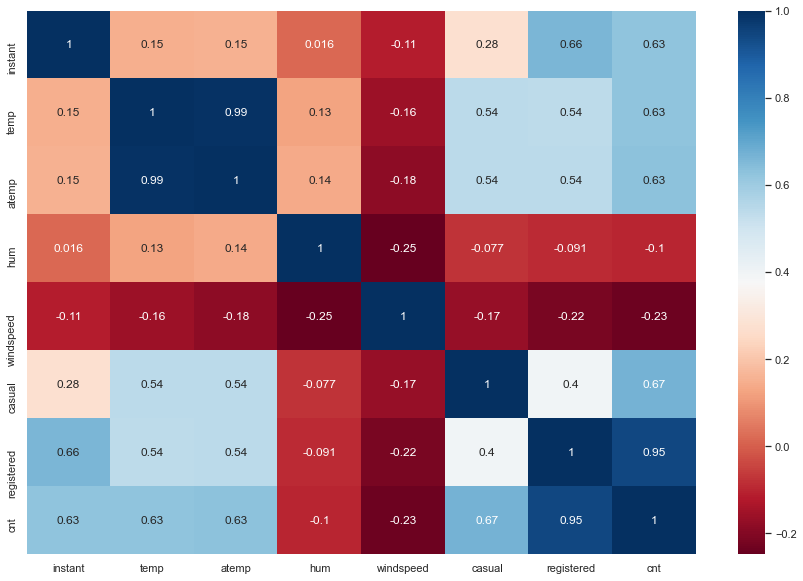

In [81]:
plt.figure(figsize = (15,10))
sns.heatmap(day.corr(), annot = True, cmap="RdBu")
plt.show()

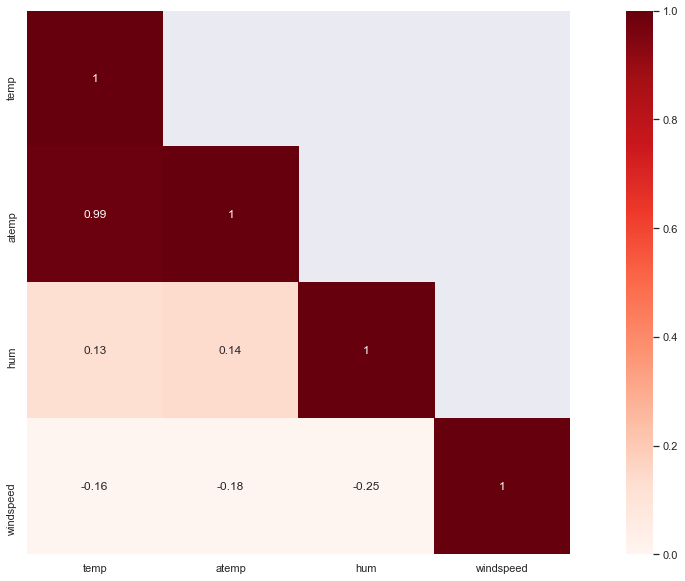

In [82]:
matrix2 = day[features1].corr()
heat2 = np.array(matrix2)
heat2[np.tril_indices_from(heat2)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.0)
sns.heatmap(matrix2, mask=heat2,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

- Same as hourly data, Casual and registered also contain direct information about the bike sharing count which is to predict. Therefore they are not considered in the features.
- The variables "temp" and "atemp" are also strongly correlated.

In [83]:
# One hot encoding on categorical columns
X4 = pd.get_dummies(day[features1], drop_first=True)
X5 = pd.get_dummies(day[features1], drop_first=True)
X6 = pd.get_dummies(day[features1], drop_first=True)

In [84]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y_day.casual, test_size = 0.3, random_state = 0)
print(f"X train shape {X_train4.shape}")
print(f"X test shape {X_test4.shape}")
print(f"y train shape {y_train4.shape}")
print(f"y test shape {y_test4.shape}")

X train shape (511, 29)
X test shape (220, 29)
y train shape (511,)
y test shape (220,)


In [85]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y_day.registered, test_size = 0.3, random_state = 0)
print(f"X train shape {X_train5.shape}")
print(f"X test shape {X_test5.shape}")
print(f"y train shape {y_train5.shape}")
print(f"y test shape {y_test5.shape}")

X train shape (511, 29)
X test shape (220, 29)
y train shape (511,)
y test shape (220,)


In [86]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y_day.cnt, test_size = 0.3, random_state = 0)
print(f"X train shape {X_train6.shape}")
print(f"X test shape {X_test6.shape}")
print(f"y train shape {y_train6.shape}")
print(f"y test shape {y_test6.shape}")

X train shape (511, 29)
X test shape (220, 29)
y train shape (511,)
y test shape (220,)


In [87]:
stdscaler = preprocessing.StandardScaler()

In [88]:
X_train4 = stdscaler.fit_transform(X_train4)
X_test4 = stdscaler.transform(X_test4)
print(f"X train shape and X test shape {X_train4.shape, X_test4.shape}")

X train shape and X test shape ((511, 29), (220, 29))


In [89]:
X_train5 = stdscaler.fit_transform(X_train5)
X_test5 = stdscaler.transform(X_test5)
print(f"X train shape and X test shape {X_train5.shape, X_test5.shape}")

X train shape and X test shape ((511, 29), (220, 29))


In [90]:
X_train6 = stdscaler.fit_transform(X_train6)
X_test6 = stdscaler.transform(X_test6)
print(f"X train shape and X test shape {X_train6.shape, X_test6.shape}")

X train shape and X test shape ((511, 29), (220, 29))


### Linear Regression Model

In [91]:
#lm = LinearRegression()
#training model in training set
lm4 = LinearRegression().fit(X_train4, y_train4)
lm5 = LinearRegression().fit(X_train5, y_train5)
lm6 = LinearRegression().fit(X_train6, y_train6)

**For Casual users**

In [92]:
#making predection
y_pred_lm4_train = lm4.predict(X_train4)
y_pred_lm4_test = lm4.predict(X_test4)

pred_lm4 = pd.DataFrame({'Actual Values':  y_test4, 
                        'Predicted Values': y_pred_lm4_test,
                        'Residual': y_test4 - y_pred_lm4_test})
display(pred_lm4)

,Actual Values,Predicted Values,Residual
196,2418,1623.091195,794.908805
187,754,895.083733,-141.083733
14,222,724.799508,-502.799508
31,47,-389.358260,436.358260
390,244,245.479112,-1.479112
...,...,...,...
391,269,219.233814,49.766186
571,1383,1203.497603,179.502397
306,318,306.318210,11.681790
200,644,922.135244,-278.135244


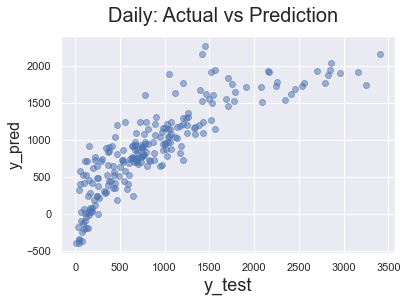

In [93]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test4, y_pred_lm4_test, alpha=.5)
fig.suptitle('Daily: Actual vs Prediction', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [94]:
# print coefficients
print('intercept: ', lm4.intercept_)
print(pd.DataFrame({'Predictor': X4.columns, 'coefficient': lm4.coef_}))

intercept:  835.7964774951078
       Predictor  coefficient
0           temp   419.537087
1          atemp   -96.453291
2            hum   -76.775101
3      windspeed   -97.366901
4       season_2   109.721091
5       season_3    74.455615
6       season_4    24.177447
7      holiday_1   -19.125752
8           yr_1   124.831377
9         mnth_2   -18.271101
10        mnth_3    70.386347
11        mnth_4    33.761499
12        mnth_5    36.361397
13        mnth_6   -14.906909
14        mnth_7    -4.817433
15        mnth_8    -6.976262
16        mnth_9    49.049752
17       mnth_10   105.677718
18       mnth_11    32.160398
19       mnth_12    -0.068335
20     weekday_1   -67.826734
21     weekday_2  -102.306369
22     weekday_3   -86.760441
23     weekday_4   -83.256807
24     weekday_5   -32.832185
25     weekday_6     7.657302
26  workingday_1  -279.518395
27  weathersit_2   -27.985445
28  weathersit_3   -38.500106


In [95]:
# print performance measure
regressionSummary(y_train4, y_pred_lm4_train)
regressionSummary(y_test4, y_pred_lm4_test)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 342.6644
            Mean Absolute Error (MAE) : 247.1981
          Mean Percentage Error (MPE) : -8.0039
Mean Absolute Percentage Error (MAPE) : 115.2565

Regression statistics

                      Mean Error (ME) : -1.4619
       Root Mean Squared Error (RMSE) : 375.4396
            Mean Absolute Error (MAE) : 271.7488
          Mean Percentage Error (MPE) : 12.7679
Mean Absolute Percentage Error (MAPE) : 102.5827


**For Registered users**

In [96]:
y_pred_lm5_train = lm5.predict(X_train5)
y_pred_lm5_test = lm5.predict(X_test5)


pred_lm5 = pd.DataFrame({ 'Actual Values':  y_test5, 
                        'Predicted Values': y_pred_lm5_test,
                        'Residual': y_test5 - y_pred_lm5_test})
display(pred_lm5)

,Actual Values,Predicted Values,Residual
196,3505,2744.041346,760.958654
187,3838,3819.136735,18.863265
14,1026,780.718060,245.281940
31,1313,1466.661113,-153.661113
390,3831,3497.892660,333.107340
...,...,...,...
391,3187,3068.960282,118.039718
571,6790,5575.500759,1214.499241
306,3656,3398.883786,257.116214
200,3688,3899.806643,-211.806643


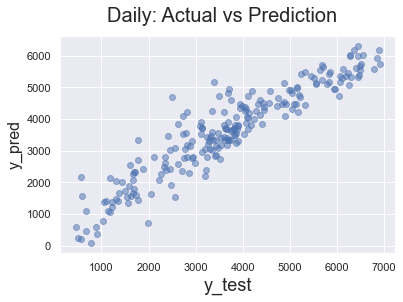

In [97]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test5, y_pred_lm5_test, alpha=.5)
fig.suptitle('Daily: Actual vs Prediction', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [98]:
# print coefficients
print('intercept: ', lm5.intercept_)
print(pd.DataFrame({'Predictor': X5.columns, 'coefficient': lm5.coef_}))

intercept:  3652.1428571428573
       Predictor  coefficient
0           temp   313.499638
1          atemp   263.033419
2            hum  -182.133937
3      windspeed  -158.963885
4       season_2   273.290217
5       season_3   362.981308
6       season_4   639.261672
7      holiday_1   -16.234191
8           yr_1   833.210133
9         mnth_2    47.949965
10        mnth_3    75.762145
11        mnth_4    54.700708
12        mnth_5   136.216941
13        mnth_6    38.070783
14        mnth_7   -79.934372
15        mnth_8    32.443235
16        mnth_9   158.254651
17       mnth_10    24.888737
18       mnth_11   -94.197773
19       mnth_12   -21.347425
20     weekday_1    31.431437
21     weekday_2   110.789730
22     weekday_3   107.026268
23     weekday_4   128.180224
24     weekday_5    76.200319
25     weekday_6    90.594898
26  workingday_1   353.853795
27  weathersit_2  -123.743289
28  weathersit_3  -240.398062


In [99]:
regressionSummary(y_train5, y_pred_lm5_train)
regressionSummary(y_test5, y_pred_lm5_test)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 607.6123
            Mean Absolute Error (MAE) : 440.3748
          Mean Percentage Error (MPE) : -33.9825
Mean Absolute Percentage Error (MAPE) : 47.4482

Regression statistics

                      Mean Error (ME) : 52.5850
       Root Mean Squared Error (RMSE) : 594.1973
            Mean Absolute Error (MAE) : 453.5962
          Mean Percentage Error (MPE) : -2.9874
Mean Absolute Percentage Error (MAPE) : 17.2068


**For both causal and registered users**

In [100]:
y_pred_lm6_train = lm6.predict(X_train6)
y_pred_lm6_test = lm6.predict(X_test6)

pred_lm6 = pd.DataFrame({'Actual Values':  y_test6, 
                        'Predicted Values': y_pred_lm6_test,
                        'Residual': y_test6 - y_pred_lm6_test})
display(pred_lm6)

,Actual Values,Predicted Values,Residual
196,5923,4367.132541,1555.867459
187,4592,4714.220468,-122.220468
14,1248,1505.517568,-257.517568
31,1360,1077.302853,282.697147
390,4075,3743.371772,331.628228
...,...,...,...
391,3456,3288.194096,167.805904
571,8173,6778.998362,1394.001638
306,3974,3705.201996,268.798004
200,4332,4821.941886,-489.941886


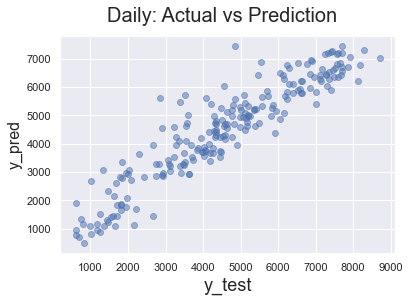

In [101]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test6, y_pred_lm6_test, alpha=.5)
fig.suptitle('Daily: Actual vs Prediction', fontsize = 20)   
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [102]:
# print coefficients
print('intercept: ', lm6.intercept_)
print(pd.DataFrame({'Predictor': X6.columns, 'coefficient': lm6.coef_}))

intercept:  4487.939334637965
       Predictor  coefficient
0           temp   733.036725
1          atemp   166.580128
2            hum  -258.909038
3      windspeed  -256.330787
4       season_2   383.011308
5       season_3   437.436923
6       season_4   663.439119
7      holiday_1   -35.359943
8           yr_1   958.041511
9         mnth_2    29.678865
10        mnth_3   146.148492
11        mnth_4    88.462207
12        mnth_5   172.578338
13        mnth_6    23.163874
14        mnth_7   -84.751805
15        mnth_8    25.466973
16        mnth_9   207.304403
17       mnth_10   130.566454
18       mnth_11   -62.037375
19       mnth_12   -21.415760
20     weekday_1   -36.395297
21     weekday_2     8.483361
22     weekday_3    20.265827
23     weekday_4    44.923417
24     weekday_5    43.368134
25     weekday_6    98.252200
26  workingday_1    74.335399
27  weathersit_2  -151.728734
28  weathersit_3  -278.898168


In [103]:
regressionSummary(y_train6, y_pred_lm6_train)
regressionSummary(y_test6, y_pred_lm6_test)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 761.5693
            Mean Absolute Error (MAE) : 554.2108
          Mean Percentage Error (MPE) : -33.7007
Mean Absolute Percentage Error (MAPE) : 47.3308

Regression statistics

                      Mean Error (ME) : 51.1230
       Root Mean Squared Error (RMSE) : 770.5573
            Mean Absolute Error (MAE) : 583.7586
          Mean Percentage Error (MPE) : -4.5535
Mean Absolute Percentage Error (MAPE) : 17.4135


In [104]:
# print R-squared
r2_score2 = pd.DataFrame([(adjusted_r2_score(y_train4, y_pred_lm4_train, lm4), 
                        adjusted_r2_score(y_train5, y_pred_lm5_train, lm5),
                        adjusted_r2_score(y_train6, y_pred_lm6_train, lm6)),
                       (adjusted_r2_score(y_test4, y_pred_lm4_test, lm4), 
                        adjusted_r2_score(y_test5, y_pred_lm5_test, lm5), 
                        adjusted_r2_score(y_test6, y_pred_lm6_test, lm6))],
                  index = ['Train Set', 'Test Set'],
                  columns=('Casual', 'Registered', 'Total'))
display(r2_score2)

,Casual,Registered,Total
Train Set,0.725402,0.833147,0.828387
Test Set,0.681490,0.845165,0.834173


From the above results of the table, it still shows that the REGISTERED users have the highest R squared with the highest accuracy around 83.31%. And the daily users have more stable plan than hourly users. In general, daily users would not easier be disturbed since their daily routine is fixed than hourly users. The overall result is also closely to the registered one, and it explained at least 83% of users data with accuracy, which is pretty good.